In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
#load all the files for a user
from matplotlib.pyplot import figure
import random
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math 
import os
import errno
import matplotlib.patches as patches
from copy import deepcopy
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse
import operator
import pdb
import calendar
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse, Circle
#%matplotlib nbagg

pd.options.mode.chained_assignment = None

staypts_filename = "C:/Users/12sha/Documents/thesislocation/Data/Final Example Results/User 001/200811/staypoints/staypoints.csv"
raw_filename = "C:/Users/12sha/Documents/Geolife Trajectories 1.3/Data/001/Trajectory/200811*.plt"
destpng = "C:/Users/12sha/Documents/thesislocation/Writings/media/staypoint_test.png"

In [11]:
filenames = glob.glob(raw_filename)
list_of_files_dfs = [pd.read_csv(filename, skiprows=6, header = None) for filename in filenames]
raw_df = pd.concat(list_of_files_dfs, ignore_index=True)
raw_df.columns = ['Latitude', 'Longitude', '0', 'Altitude', 'NumDays', 'Date', 'Time']
staypts_df = pd.read_csv(staypts_filename, sep = '\t')

# drop columns not needed
raw_df = raw_df.drop(['0', 'Altitude', 'NumDays', 'Date', 'Time'], axis=1)
staypts_df = staypts_df.drop(['Latitude', 'Longitude', 'Timestamp', 'Date', 'Time', 'Hour', 'Weekday', 'StayPoint', 'StayptId', 
                     'StayMeanLat', 'StayMeanLon', 'State', 'StateId', 'Unnamed: 0'], axis=1)
staypts_df.columns = ['Latitude', 'Longitude']
#raw_df = raw_df.drop_duplicates()
raw_df = raw_df.reset_index(drop=True)
#staypts_df = staypts_df.drop_duplicates()
staypts_df = staypts_df.reset_index(drop=True)

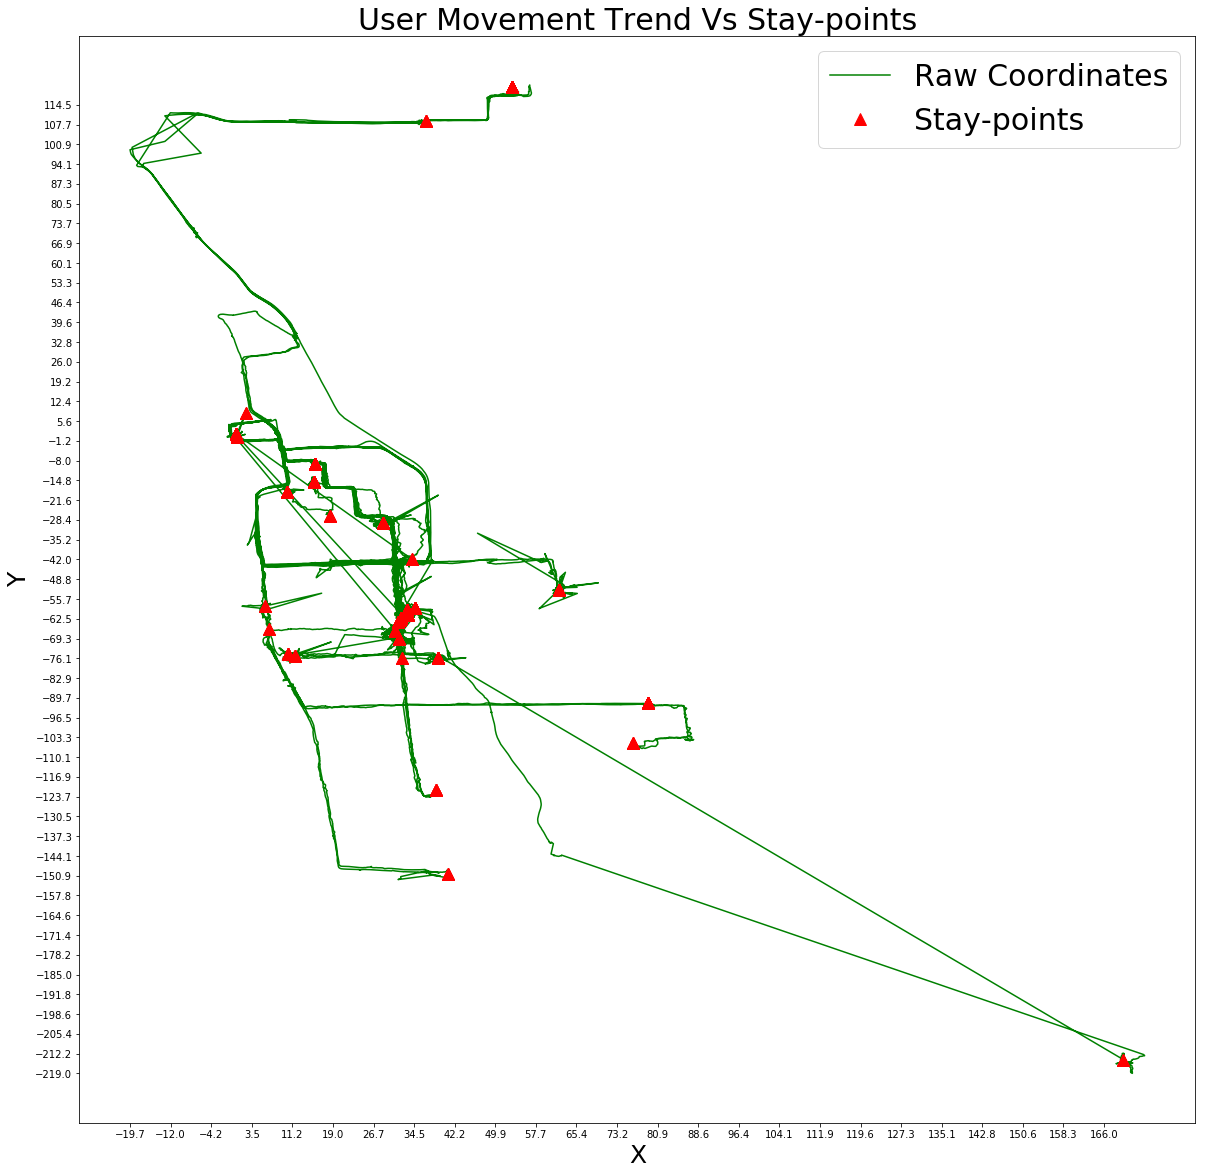

In [15]:
#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(raw_df["Latitude"][0])
origin_lon = math.radians(raw_df["Longitude"][0])
    
#convert each lat and lon into x and y for the plot w.r.t origin
EARTH_RAD = 6378100
raw_df['X'] = 0.0
raw_df['Y'] = 0.0
for i in range(0, len(raw_df)):
    x = 0
    y = 0
    current_lat = math.radians(raw_df["Latitude"][i])
    current_lon = math.radians(raw_df["Longitude"][i])
    x = ((math.cos(current_lat) + math.cos(origin_lat))/2) * EARTH_RAD * (current_lon - origin_lon) * math.pi / 180
    y = (current_lat - origin_lat)* math.pi/180 * EARTH_RAD
    raw_df.at[i, 'X'] = x
    raw_df.at[i, 'Y'] = y

fg = raw_df.plot(x='X', y='Y', color='g', label='Raw Coordinates')
plt.title('User Movement Trend Vs Stay-points', fontsize = 30)
min_x = min(raw_df['X'])
max_x = max(raw_df['X'])
min_y = min(raw_df['Y'])
max_y = max(raw_df['Y'])
xticks = np.arange(min_x,max_x,(max_x-min_x)/25)
yticks = np.arange(min_y,max_y,(max_y-min_y)/50)
fg.set(xticks=xticks, yticks=yticks)
plt.xlabel('X')
plt.ylabel('Y')

#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(raw_df["Latitude"][0])
origin_lon = math.radians(raw_df["Longitude"][0])
    
#convert each lat and lon into x and y for the plot w.r.t origin
EARTH_RAD = 6378100
staypts_df['X'] = 0.0
staypts_df['Y'] = 0.0
for i in range(0, len(staypts_df)):
    x = 0
    y = 0
    current_lat = math.radians(staypts_df["Latitude"][i])
    current_lon = math.radians(staypts_df["Longitude"][i])
    x = ((math.cos(current_lat) + math.cos(origin_lat))/2) * EARTH_RAD * (current_lon - origin_lon) * math.pi / 180
    y = (current_lat - origin_lat)* math.pi/180 * EARTH_RAD
    staypts_df.at[i, 'X'] = x
    staypts_df.at[i, 'Y'] = y
    
plt.plot(staypts_df['X'], staypts_df['Y'], 'r^', label='Stay-points', markersize=12)
plt.rcParams["figure.figsize"] = [20,20]
plt.legend(fontsize=30)
plt.xlabel("X", fontsize=25)
plt.ylabel("Y", fontsize=25)
plt.savefig(destpng)
plt.show()

